In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import poisson
from collections import Counter

2. Implement a function that returns the adjacency matrix of one
realization of the ER graph with given values of N and p. Watch out
for the trap!

In [ ]:
def generate_erdos_renyi_graph(N, p):
    adj_matrix = np.zeros((N, N), dtype=int)
    
    for x in range(N):
        for y in range(x+1, N):  
            if np.random.rand() <= p: # @TODO: random uniform?
                adj_matrix[x][y] = 1
                adj_matrix[y][x] = 1  

    return adj_matrix


In [5]:
N = 5  
p = 0.4  

adj_matrix = generate_erdos_renyi_graph(N, p)
print("Adjacency Matrix:")
print(adj_matrix)

Adjacency Matrix:
[[0 0 1 1 1]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [1 0 0 0 0]]


3. Draw resulting graph

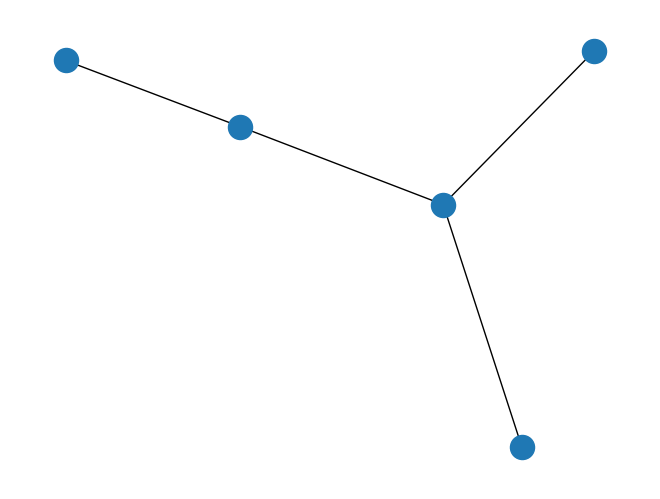

In [6]:
G = nx.from_numpy_array(adj_matrix)

nx.draw(G)

4. Draw histogram of degree distribution.

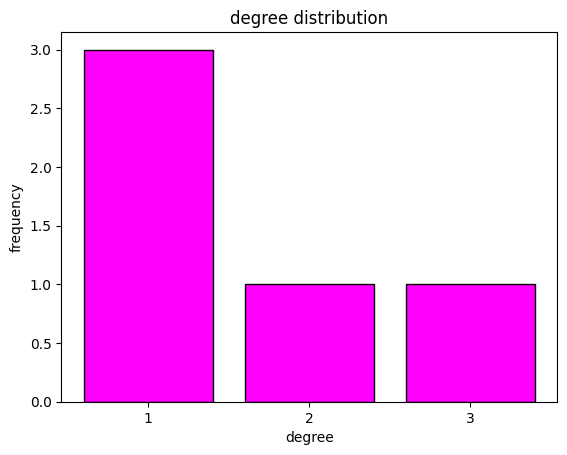

In [14]:
degrees = [G.degree(node) for node in G.nodes()]

degree_counts = Counter(degrees)

degree_values = list(degree_counts.keys())
degree_frequencies = list(degree_counts.values())

plt.bar(degree_values, degree_frequencies, color='fuchsia', edgecolor='black', align='center')
plt.title(f"degree distribution")
plt.xlabel('degree')
plt.ylabel('frequency')
plt.xticks(np.arange(min(degrees), max(degrees) + 1))
plt.show()

5. What degree of vertex distribution do we expect?

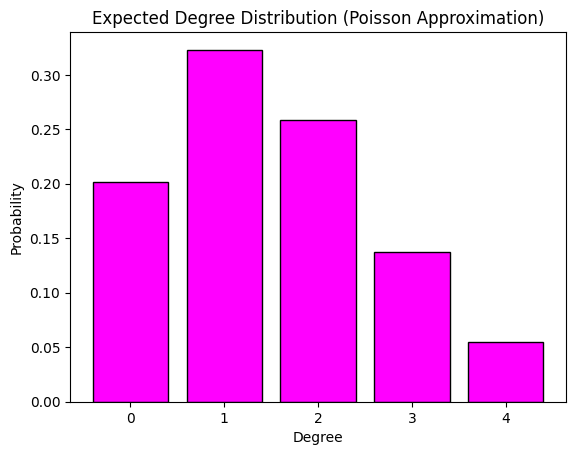

In [15]:
expected_degree = (N - 1) * p
degrees = np.arange(0, N)
poisson_dist = poisson.pmf(degrees, expected_degree)

plt.bar(degrees, poisson_dist, edgecolor='black',  color='fuchsia')
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.title("Expected Degree Distribution (Poisson Approximation)")
plt.show()

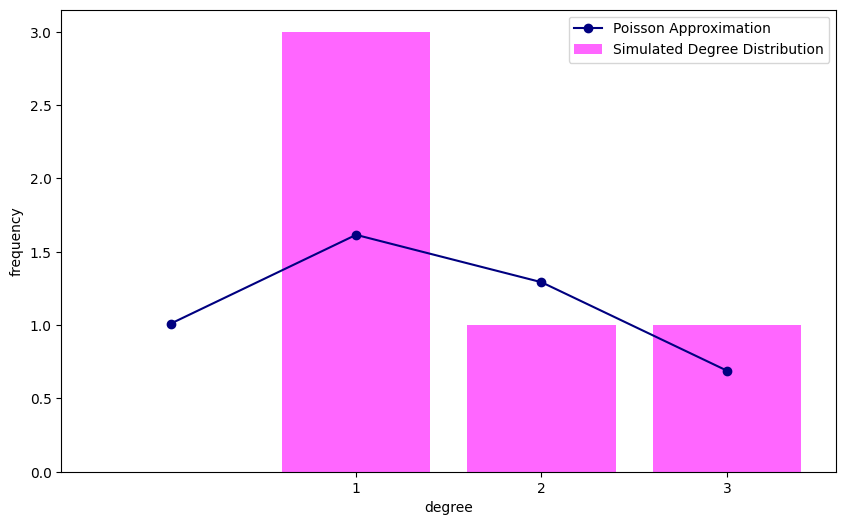

In [21]:
expected_degree = (N - 1) * p
poisson_dist = poisson.pmf(np.arange(len(degree_counts)), expected_degree) * len(degrees)

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(degree_counts)), degree_counts, alpha=0.6, label="Simulated Degree Distribution", color='fuchsia')
plt.plot(np.arange(len(poisson_dist)), poisson_dist, 'o-', label="Poisson Approximation", color='navy')
plt.xlabel("degree")
plt.ylabel("frequency")
plt.xticks(np.arange(min(degrees), max(degrees) + 1))

plt.legend()
plt.show()

In [ ]:
def plot_comaparison(N, p):
    adj_matrix = generate_erdos_renyi_graph(N, p)
    G = nx.from_numpy_array(adj_matrix)
    
    # bibliotek wbudowana ER graph i sprawdzic
    
    degrees = [G.degree(node) for node in G.nodes()]
    degree_counts = Counter(degrees)
    
    expected_degree = (N - 1) * p
    poisson_dist = poisson.pmf(np.arange(len(degree_counts)), expected_degree) * len(degrees)

    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(degree_counts)), degree_counts, alpha=0.6, label="Simulated Degree Distribution", color='fuchsia')
    plt.plot(np.arange(len(poisson_dist)), poisson_dist, 'o-', label="Poisson Approximation", color='navy')
    plt.xlabel("degree")
    plt.ylabel("frequency")
    plt.title(f'p = {p}, N = {N}')

    plt.legend()
    plt.show()

 8. Check dependence of the results of the previous excercise for
various values of p and N.

In [ ]:
n_values = [10, 50, 100, 200, 300]  # wiekszy n > 300
p_values = [0.05, 0.1, 0.2, 0.3, 0.4] # mniejsze p 
# @TODO: usrednic

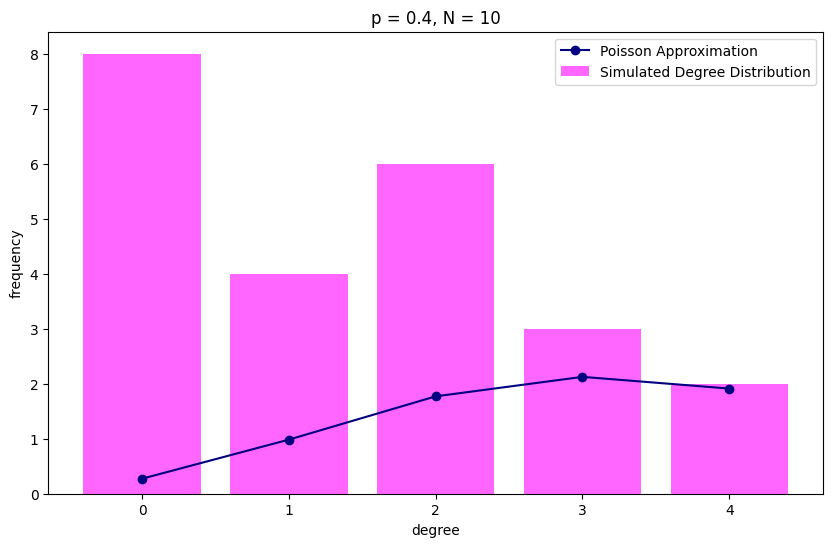

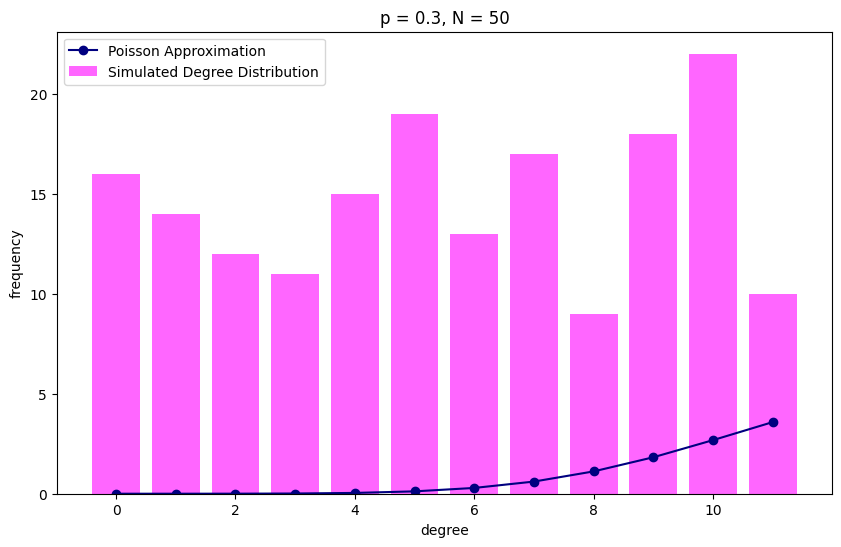

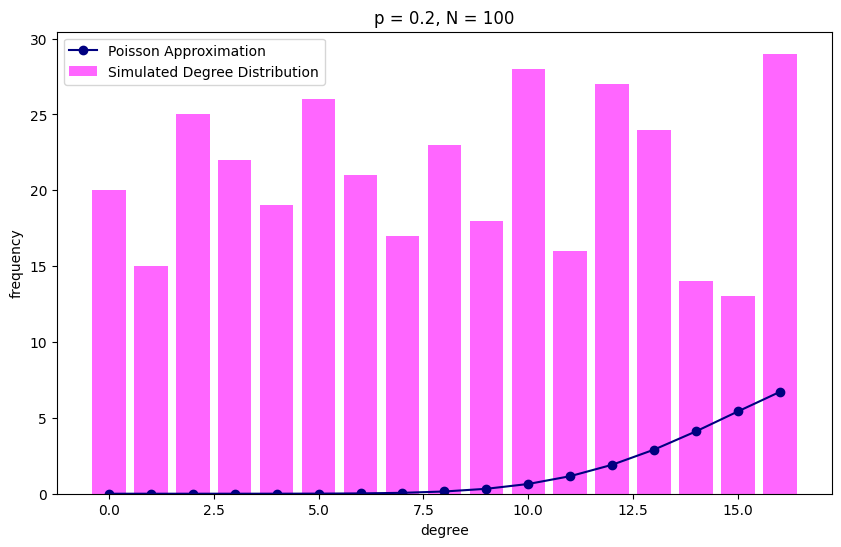

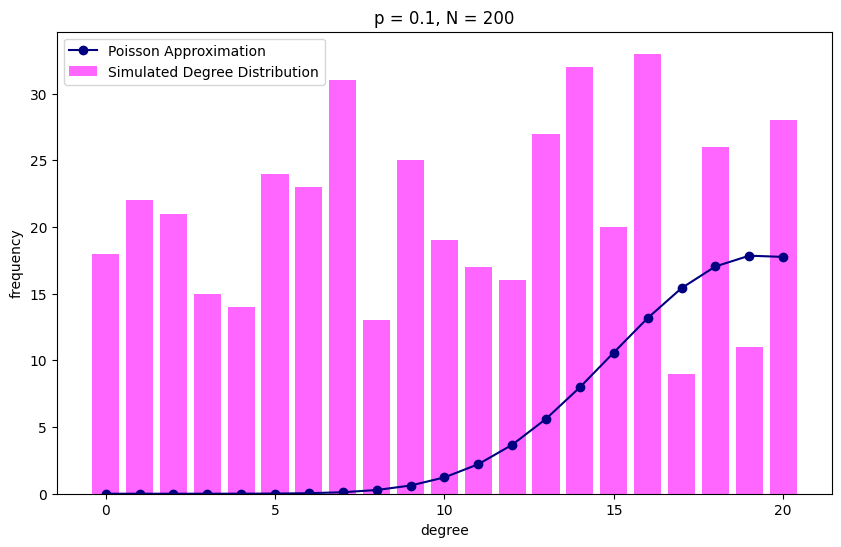

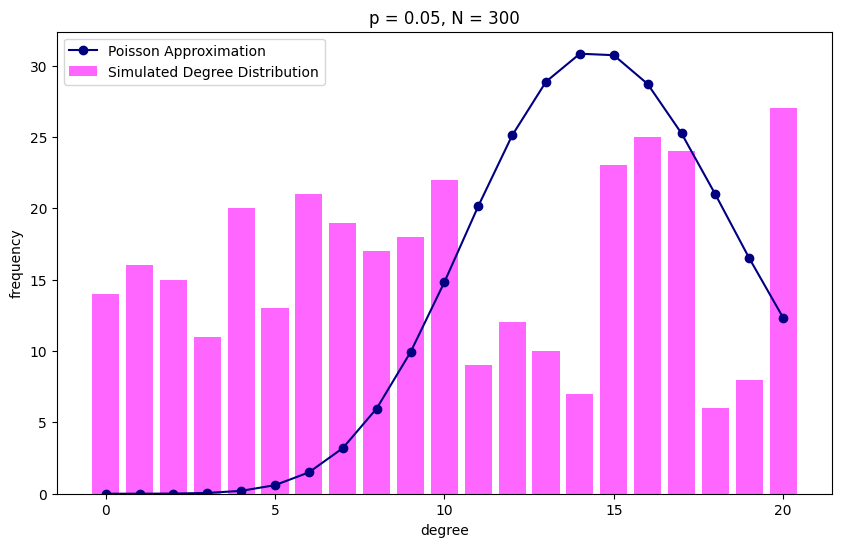

In [ ]:
for n, p in zip(n_values, reversed(p_values)):
    plot_comaparison(n, p)
    
# nie frequency tylko pmf
#github: gsiudem

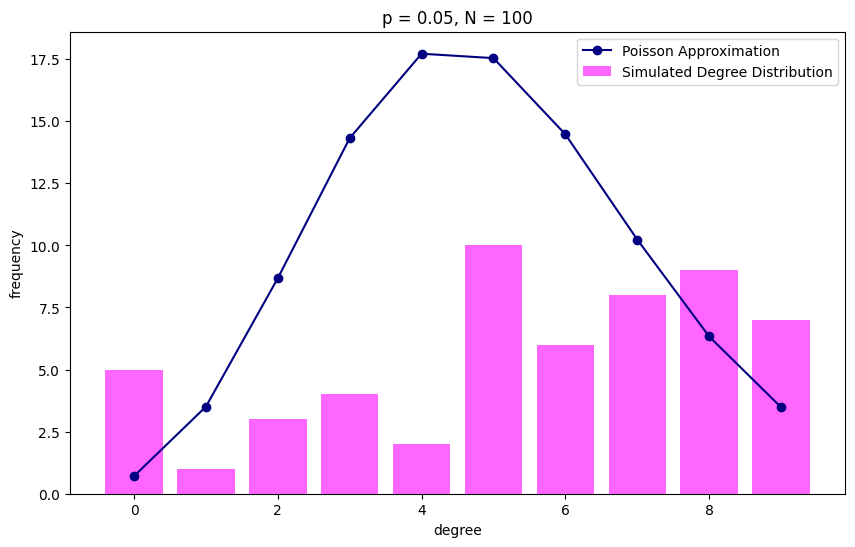

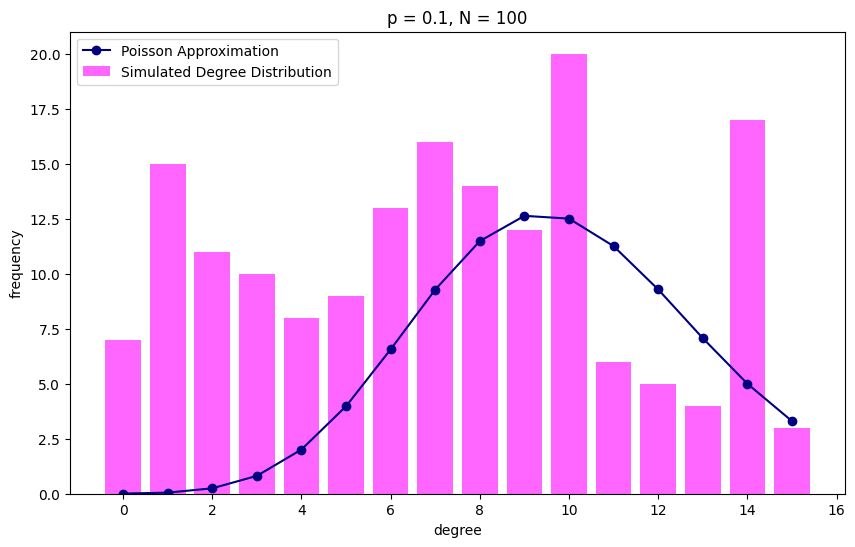

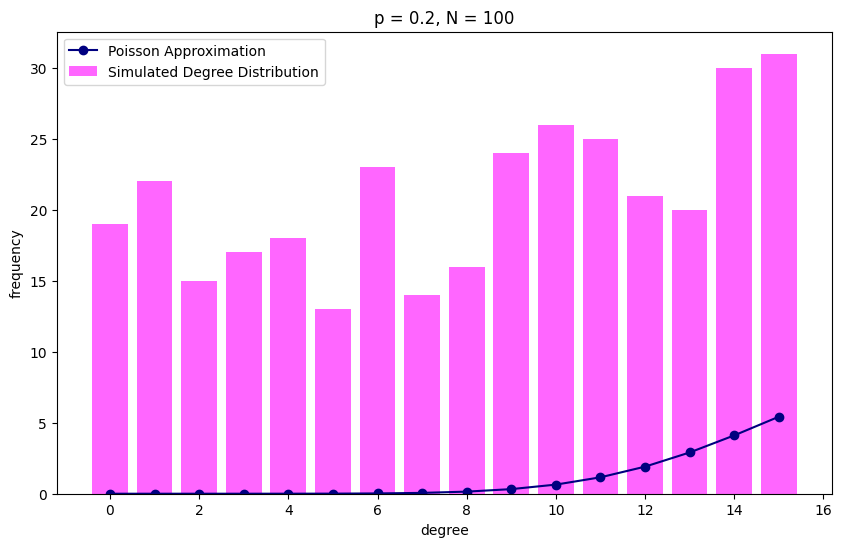

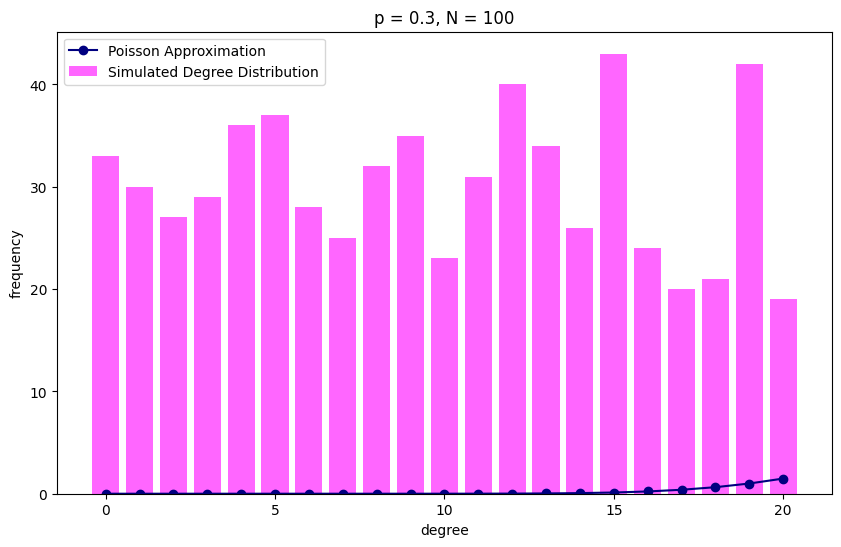

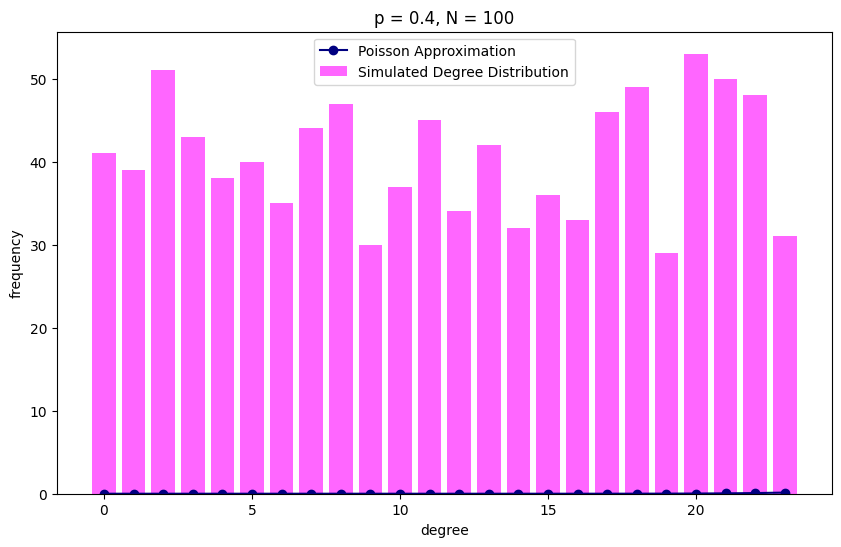

In [46]:
# stałe N
for p in p_values:
    plot_comaparison(100, p)

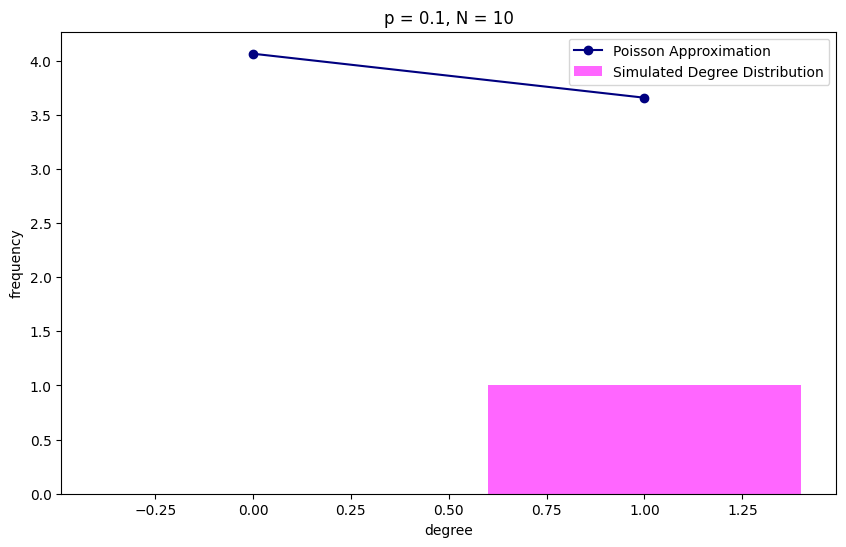

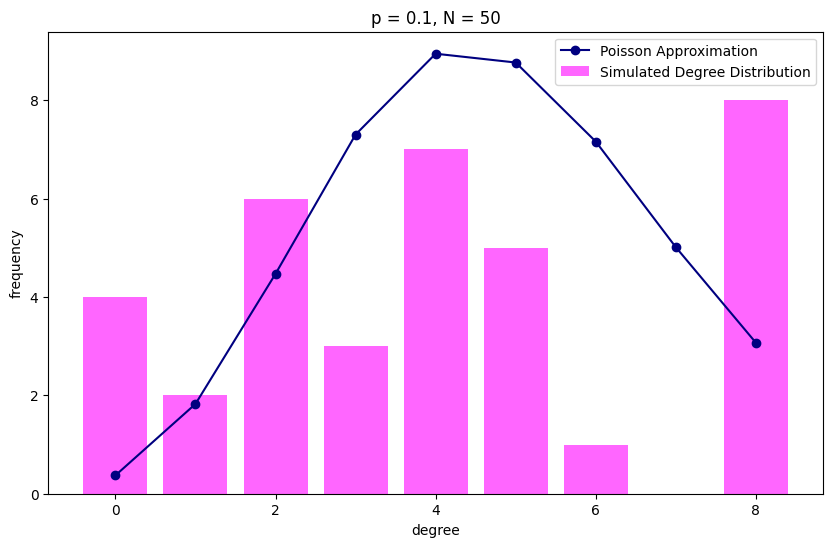

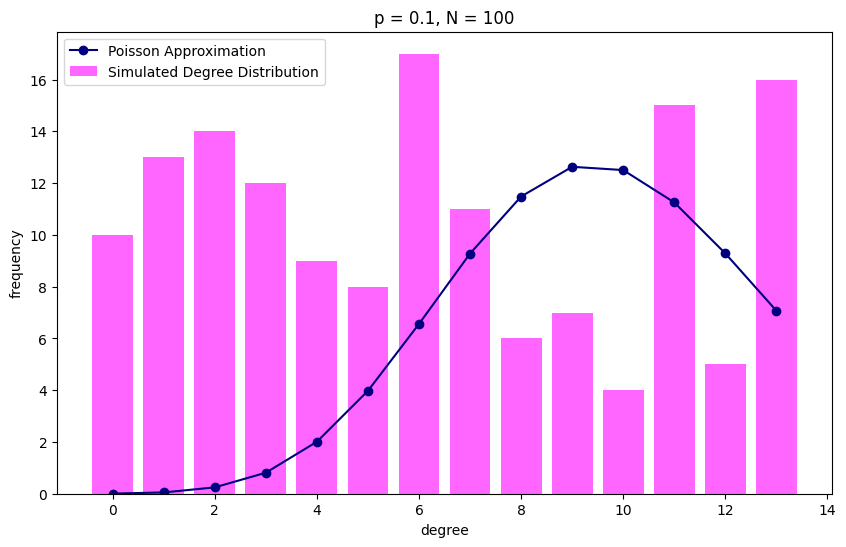

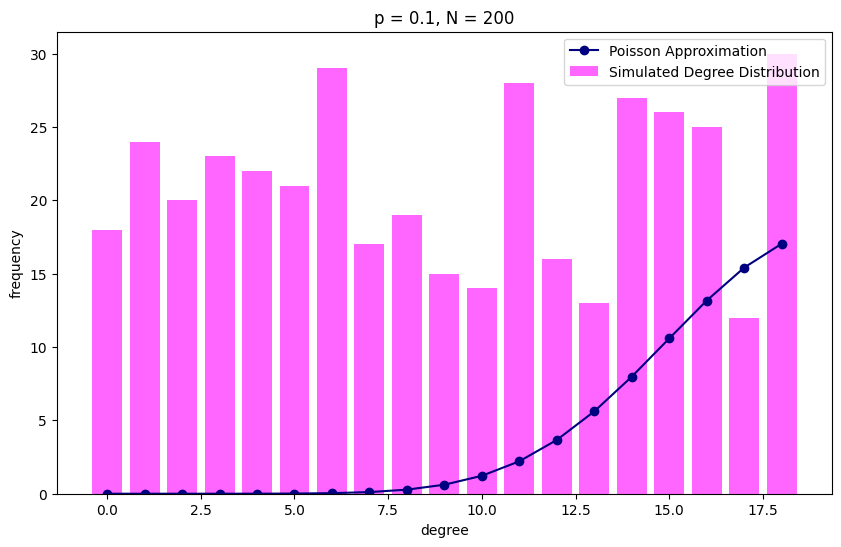

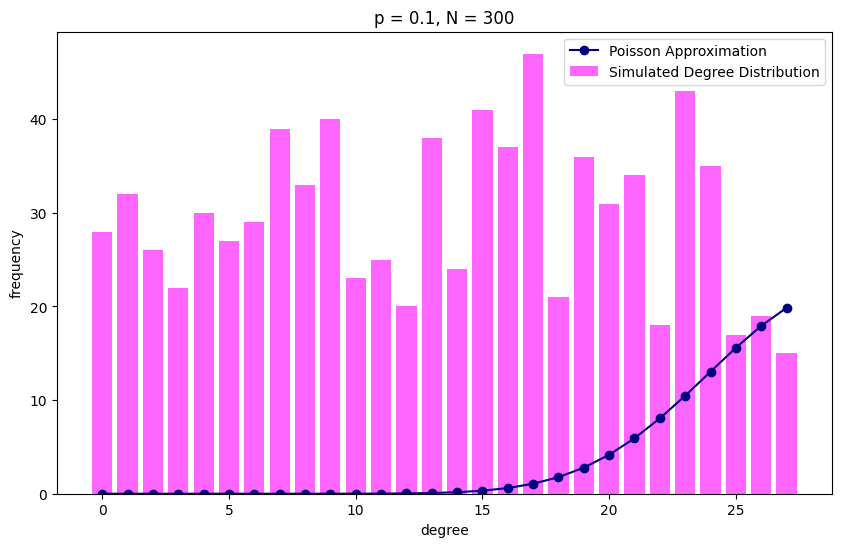

In [47]:
# stałe p
for n in n_values:
    plot_comaparison(n, 0.1)